In [1]:
from keras.applications.vgg16 import VGG16,preprocess_input
#Load the model
model = VGG16()

553467096/553467096 [==============================] - 29s 0us/step


In [2]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

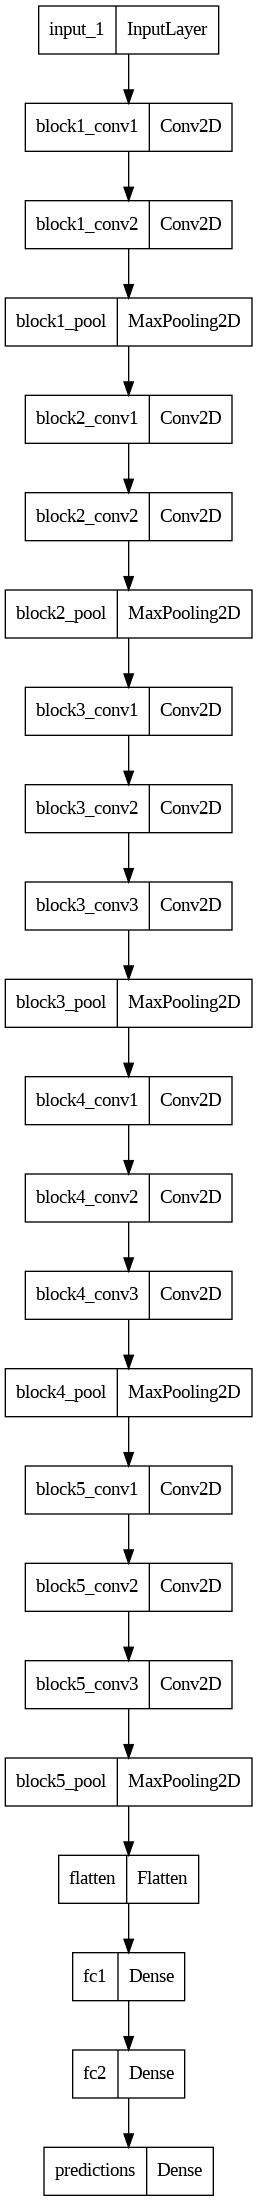

In [3]:
from keras.utils import plot_model
plot_model(model)

In [4]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 50.7 MB/s eta 0:00:00


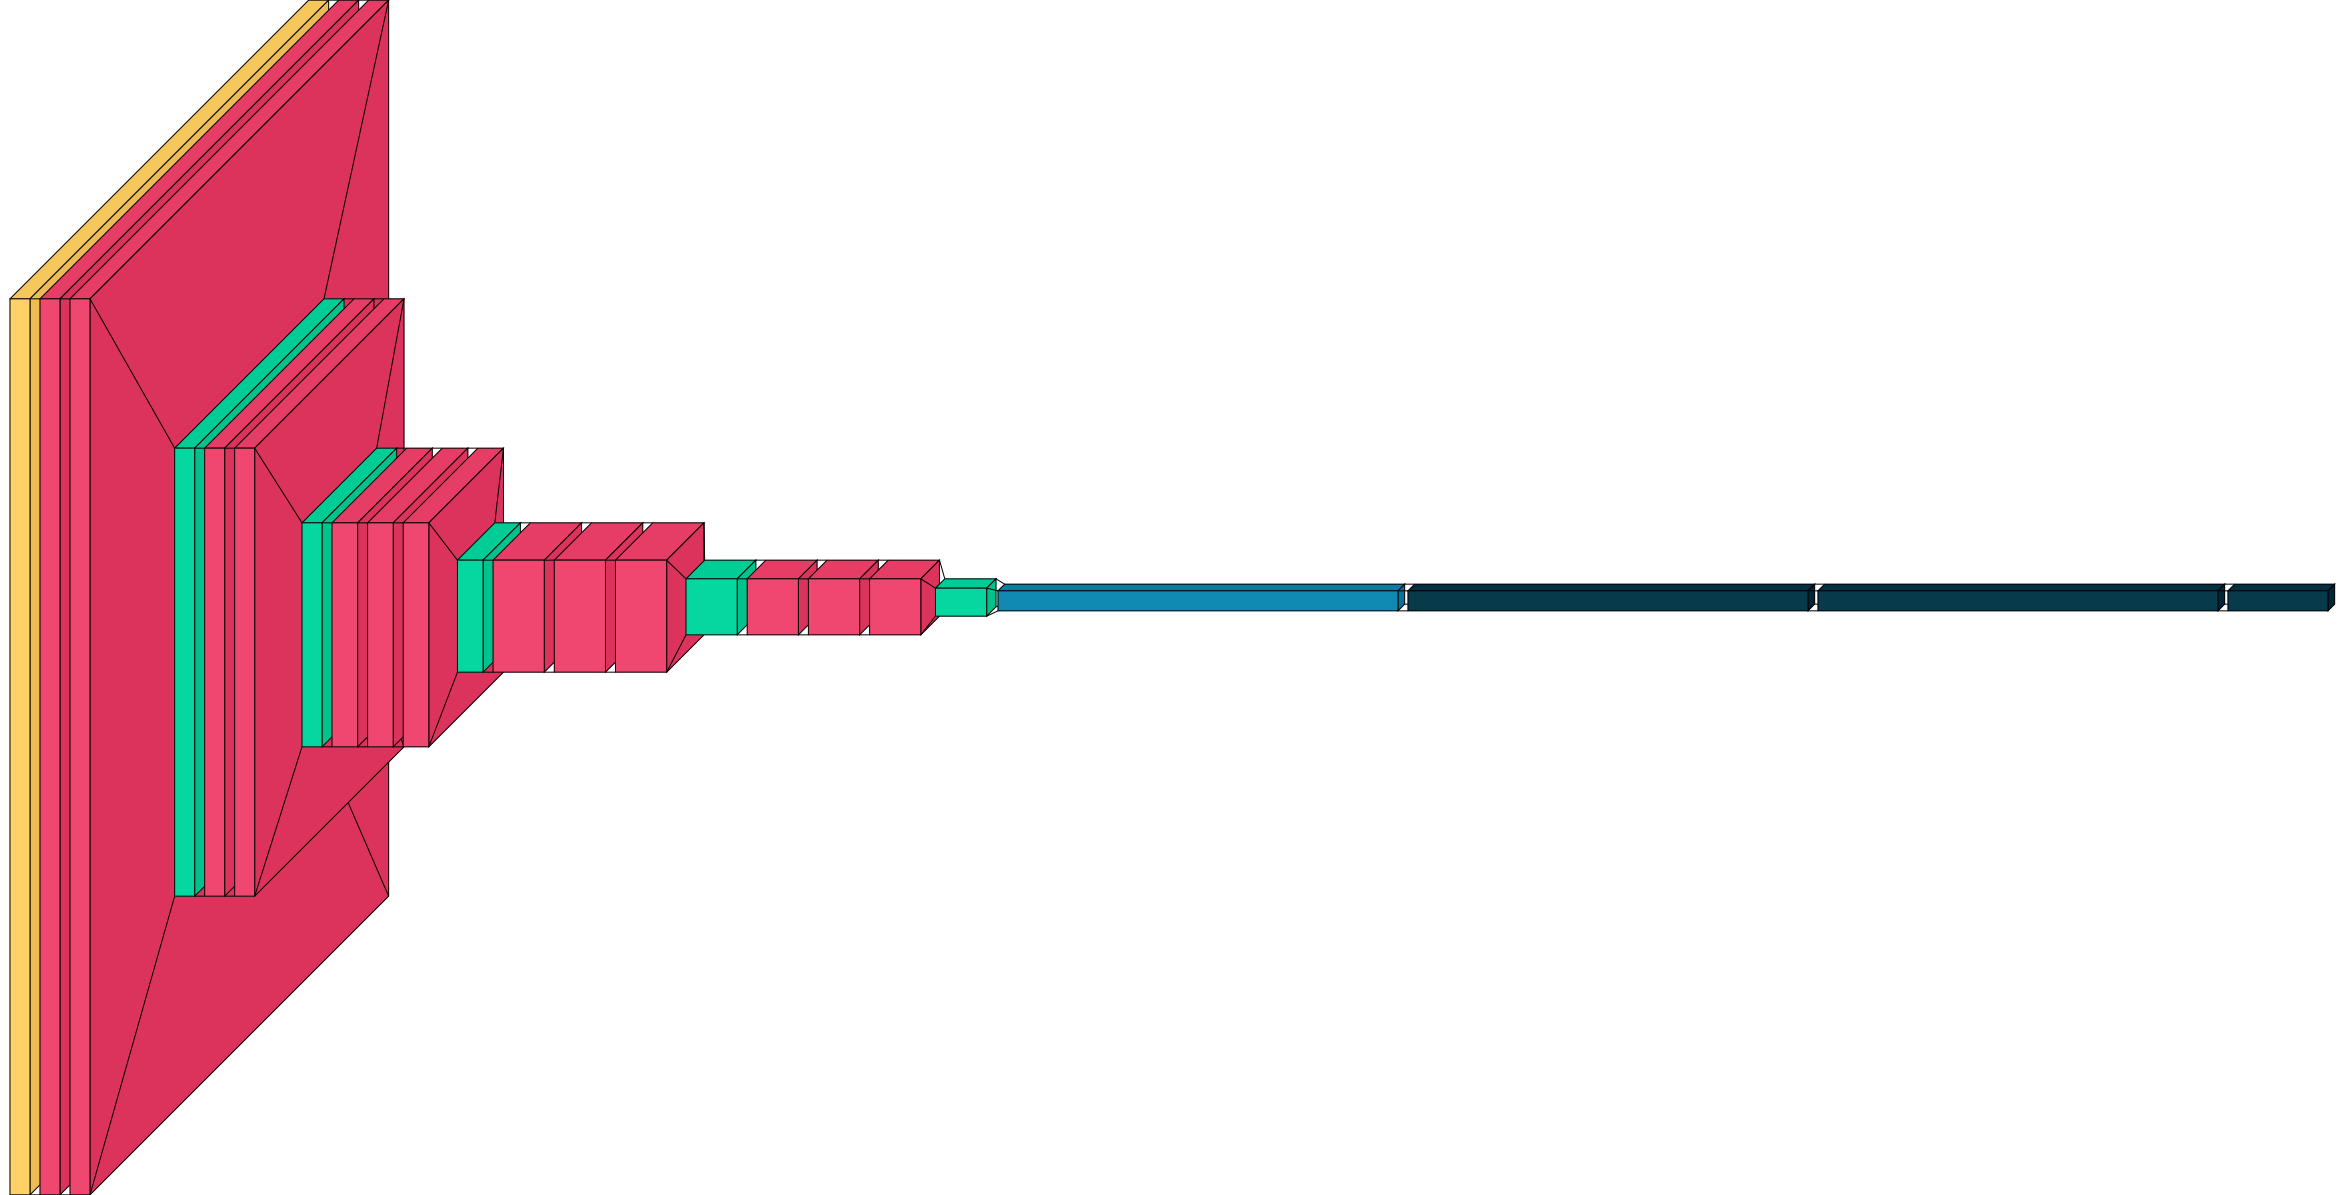

In [5]:
import visualkeras
visualkeras.layered_view(model)

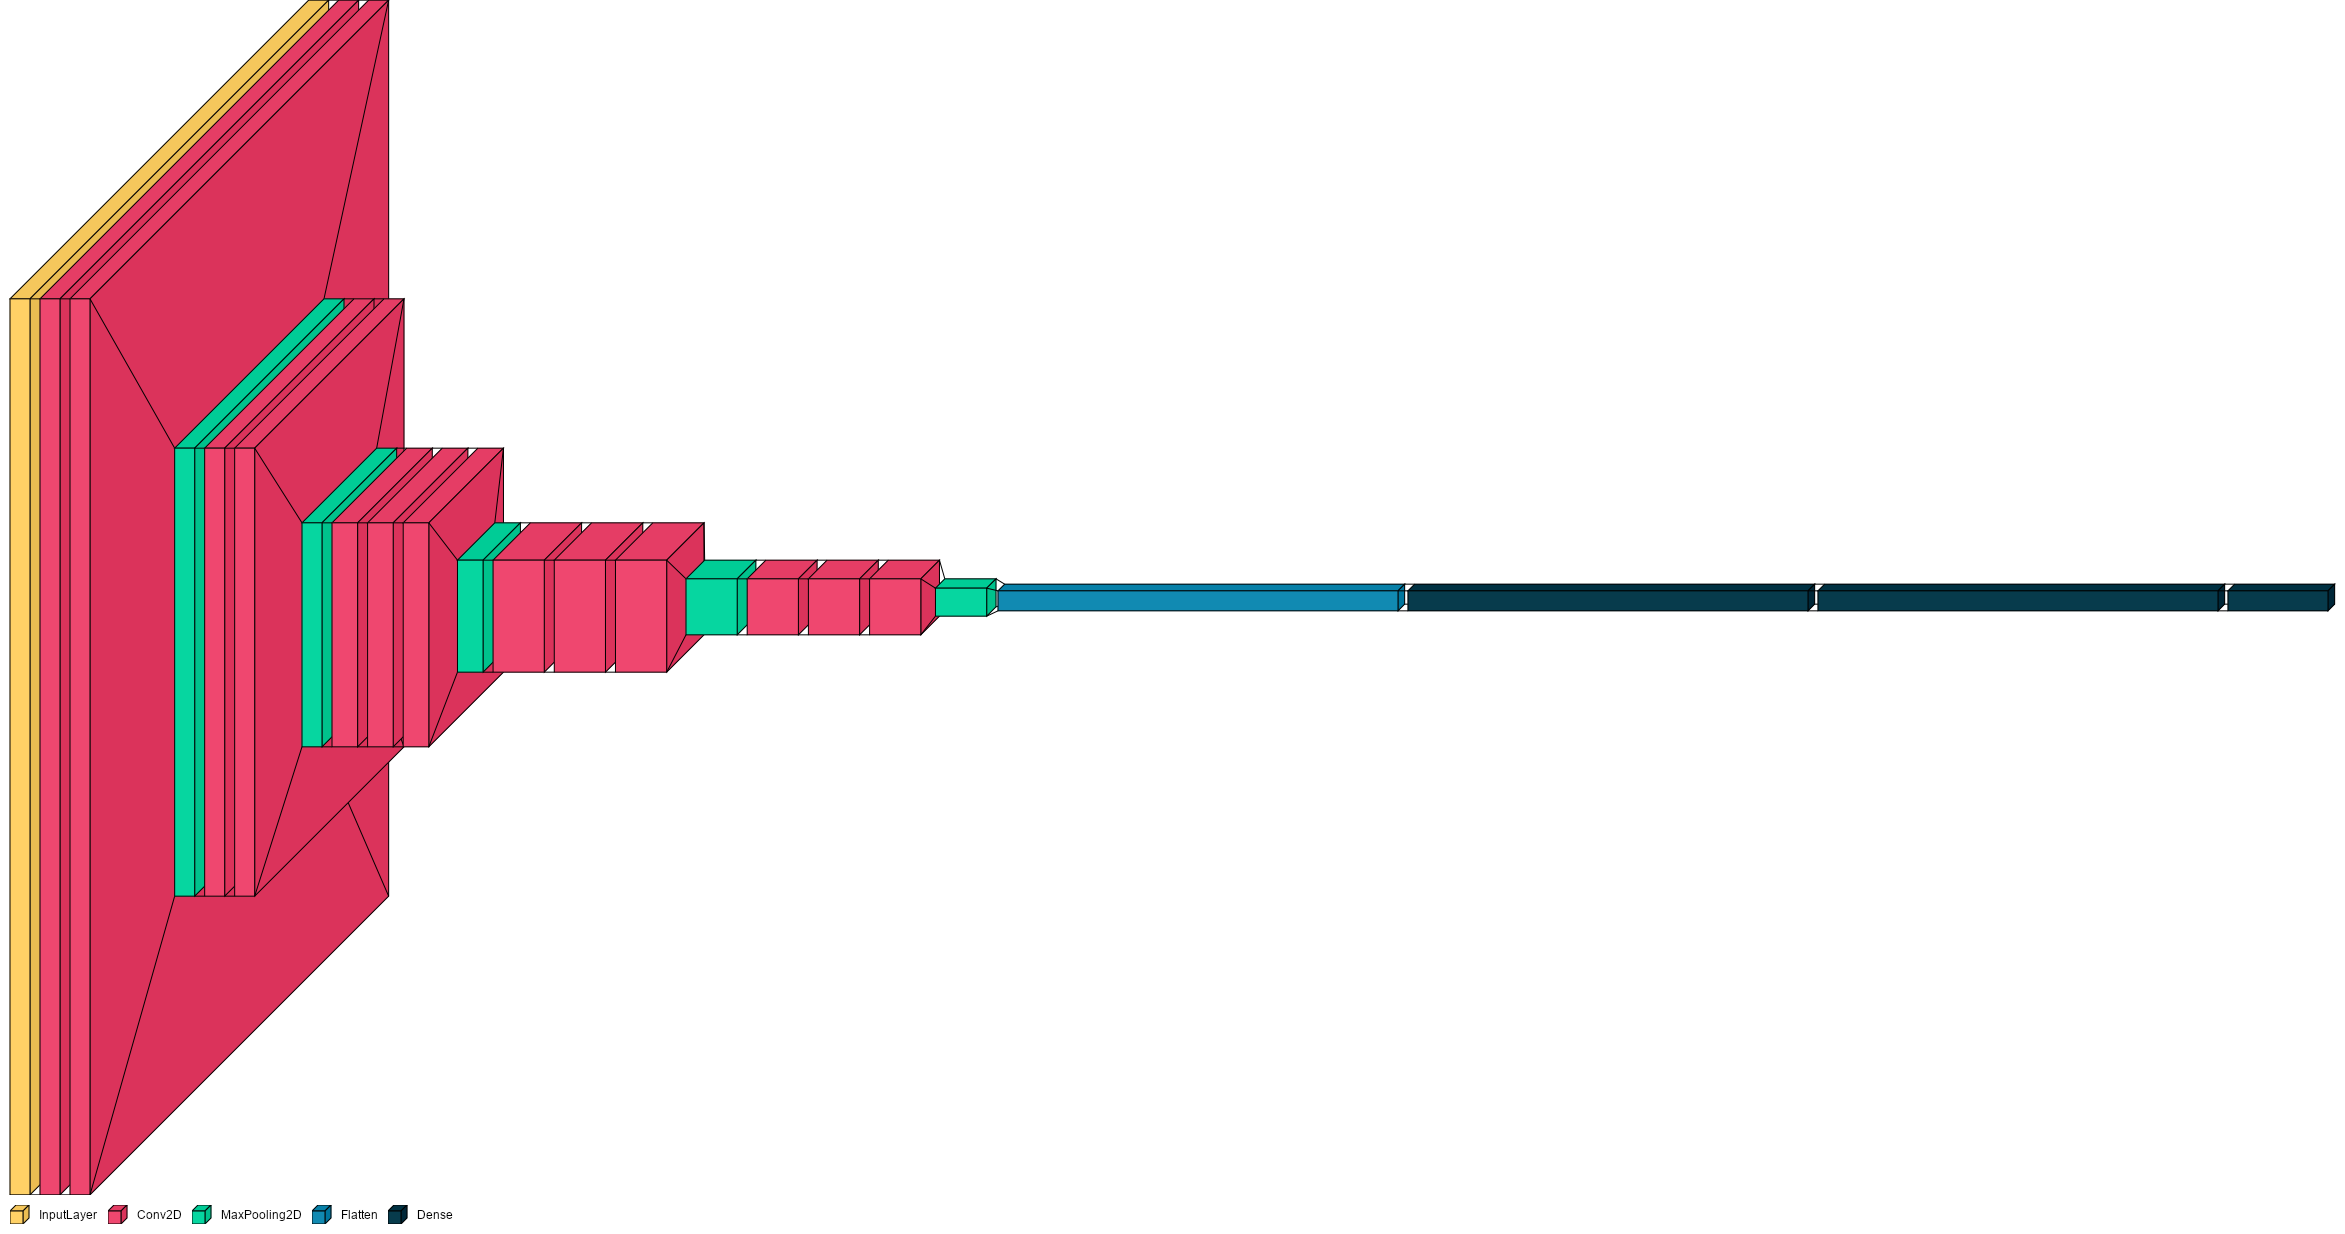

In [7]:
visualkeras.layered_view(model, legend=True) # without custom font
from PIL import ImageFont
import os
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font) # selected font

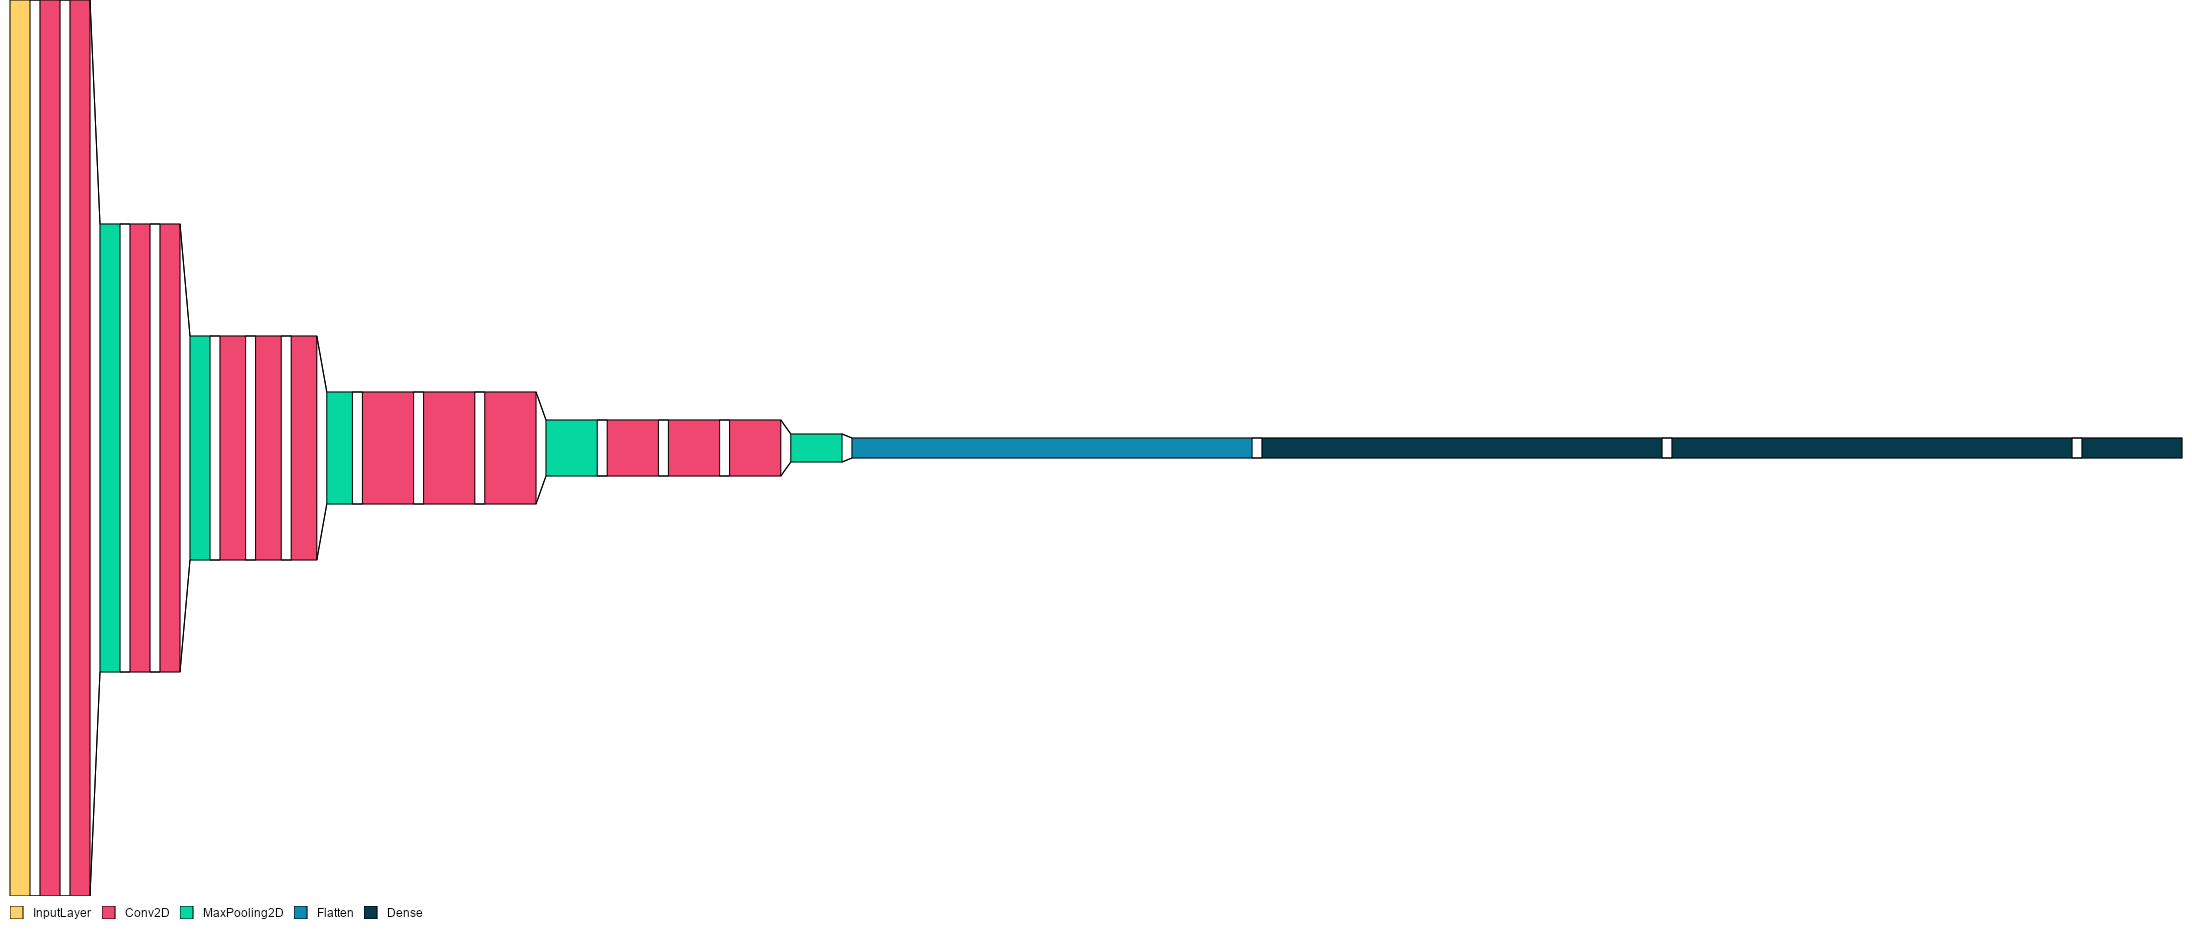

In [8]:
visualkeras.layered_view(model, legend=True, font=font, draw_volume=False)

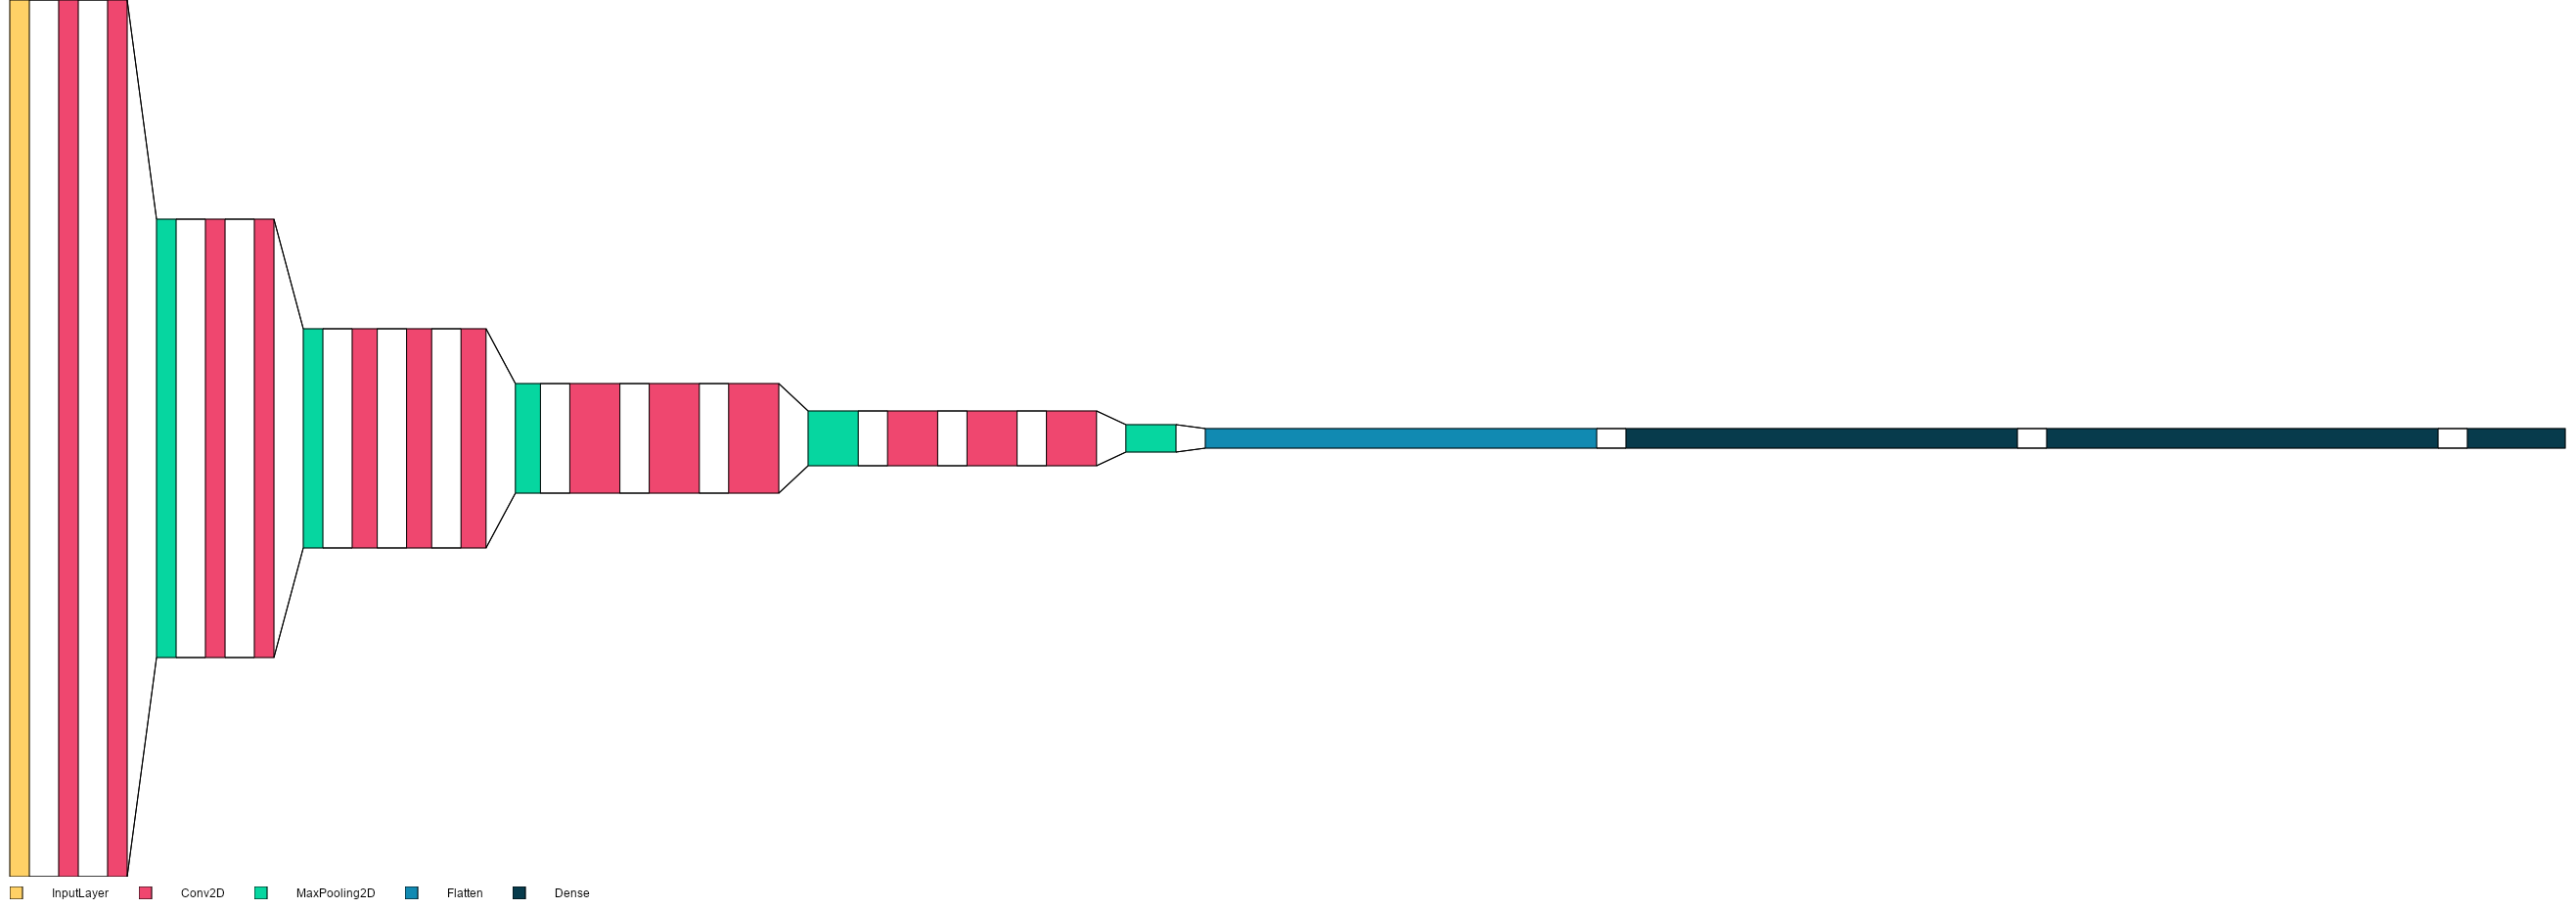

In [9]:
visualkeras.layered_view(model, legend=True, font=font, draw_volume=False,spacing=30)

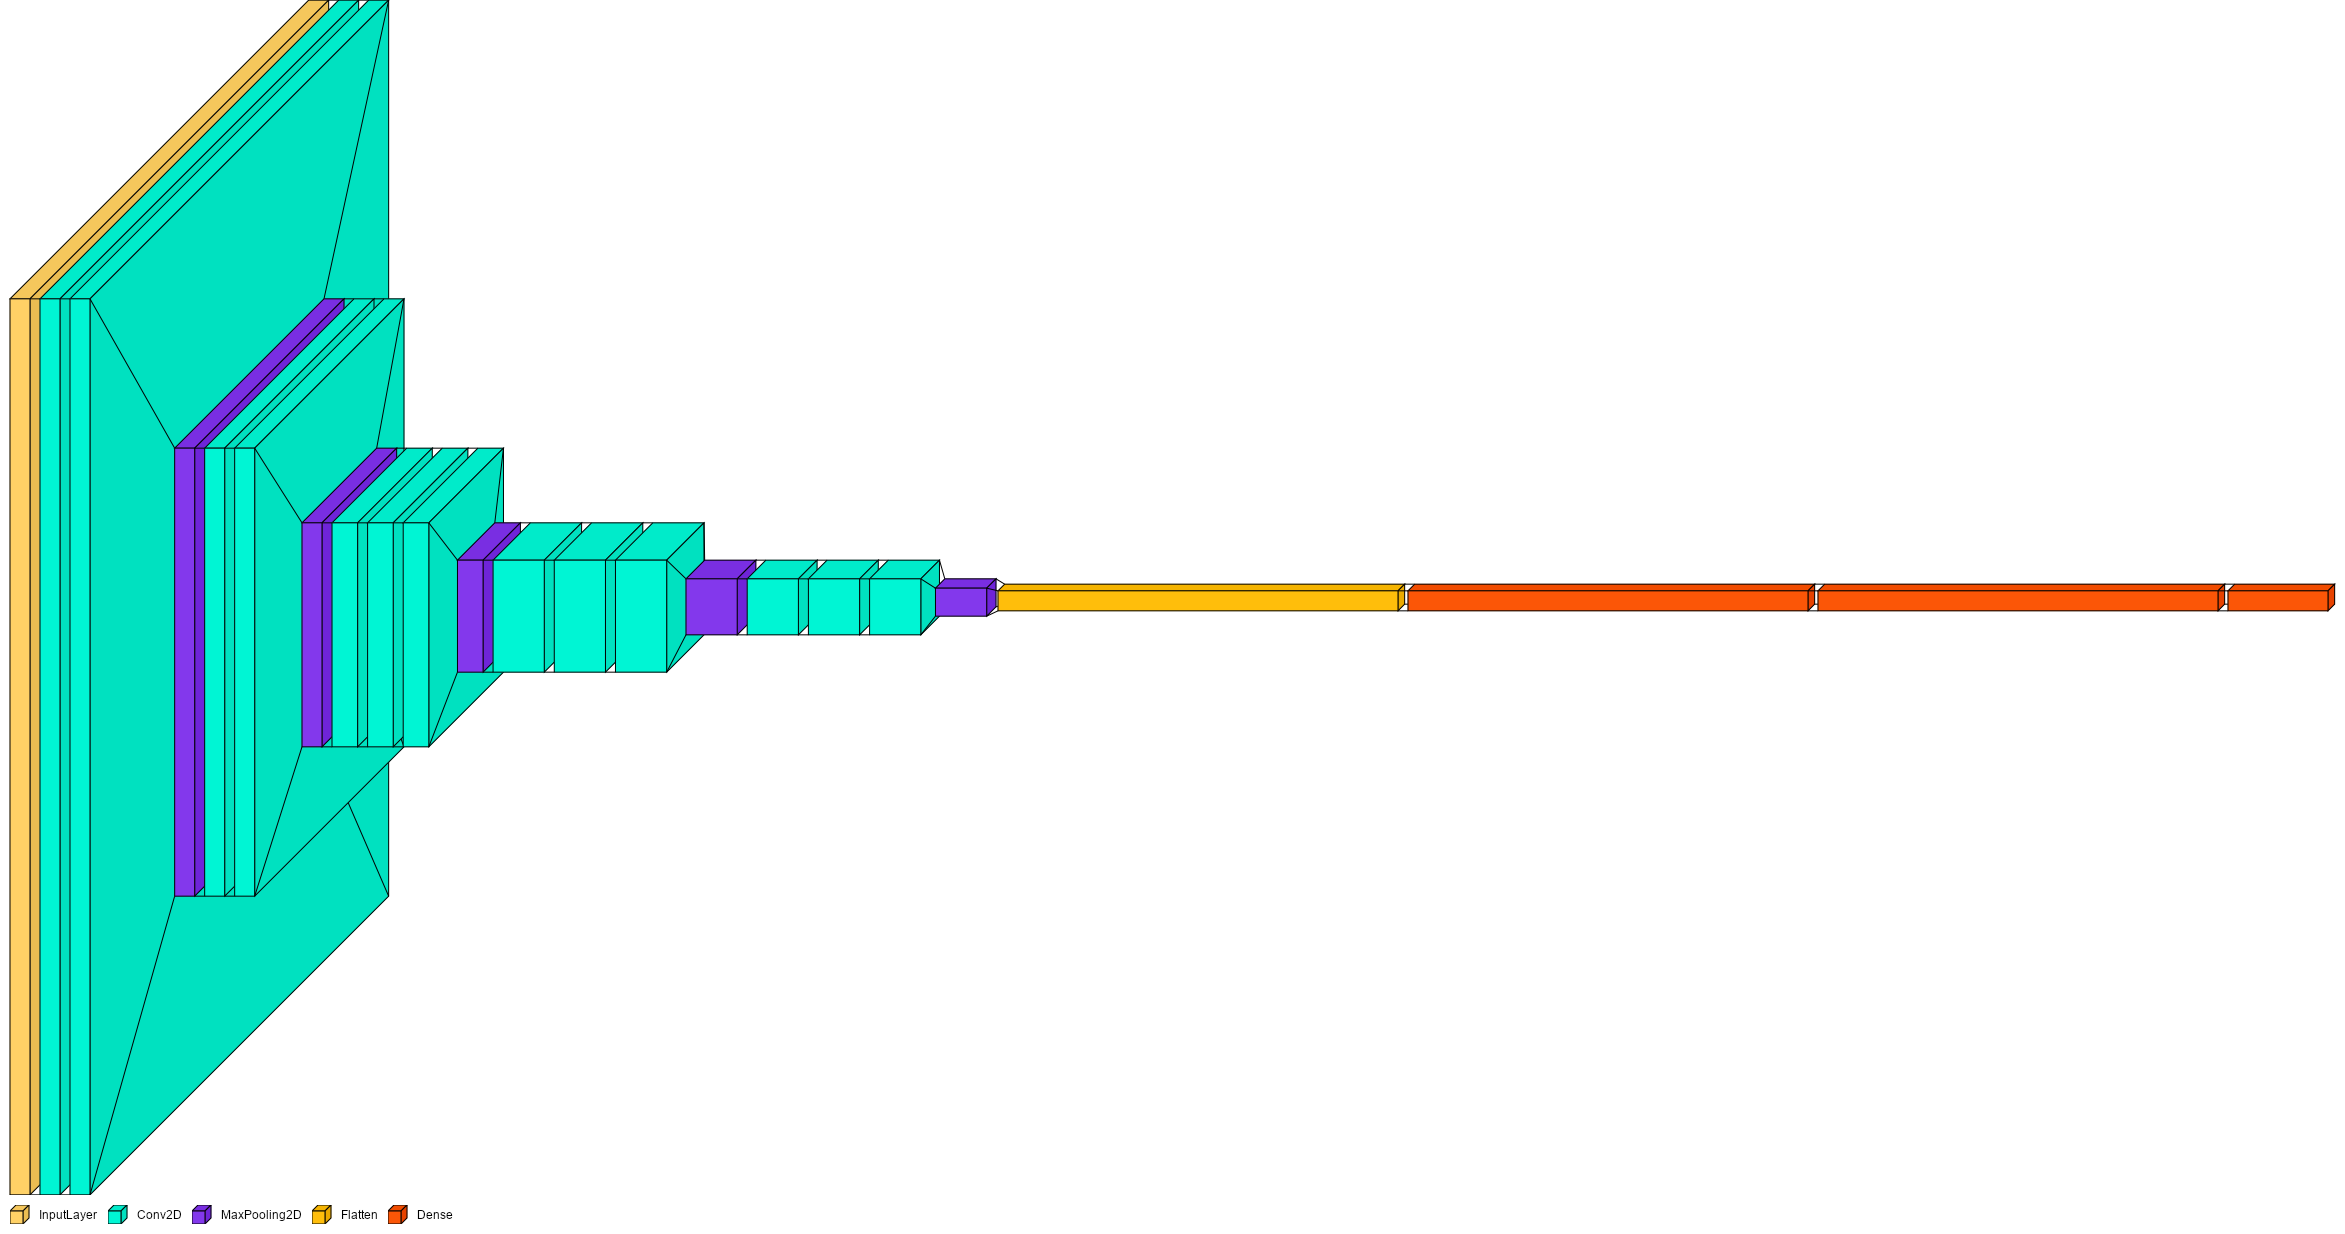

In [10]:
from tensorflow.keras import layers
from collections import defaultdict
color_map = defaultdict(dict)#customize the colours
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
visualkeras.layered_view(model, legend=True, font=font,color_map=color_map)

In [11]:
for i in range(len(model.layers)):
	# check for convolutional layer
	if 'conv' not in model.layers[i].name:
		continue
	# get filter weights
	filters, biases = model.layers[i].get_weights()
	print("layer number",i,model.layers[i].name, filters.shape)

layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


In [12]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()

In [13]:

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

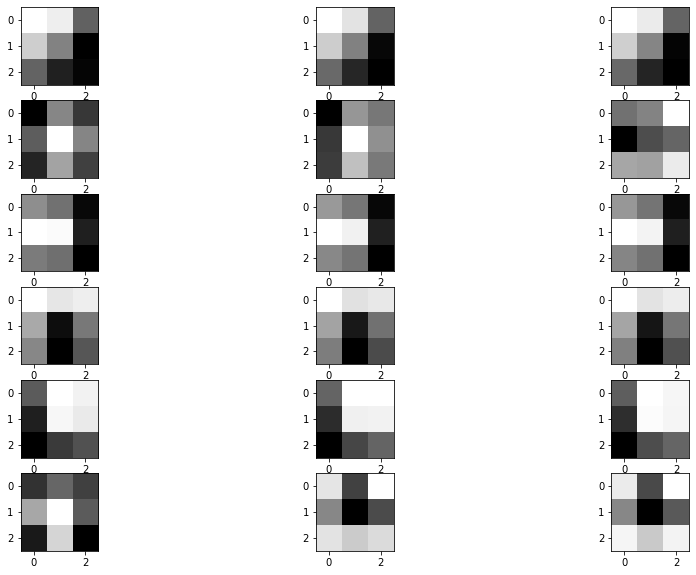

In [14]:
# we will print 18 filter from 1st convolution 64 filter.
from matplotlib import pyplot
n_filters =6
ix=1
fig = pyplot.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        pyplot.subplot(n_filters,3,ix)
        pyplot.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters 
pyplot.show()

In [15]:
import keras
import numpy as np
model = keras.models.Model(inputs=model.inputs , outputs=model.layers[1].output)

In [18]:
image = keras.utils.load_img("/content/vk.jpeg" , target_size=(224,224))

# convert the image to an array
image = keras.utils.img_to_array(image)
# expand dimensions so that it represents a single 'sample'
image = np.expand_dims(image, axis=0)

image = preprocess_input(image)

In [24]:
features = model.predict(image)

1/1 [==============================] - 0s 20ms/step


In [26]:
# This is the shape of 1st conv layer
features.shape

(1, 224, 224, 64)

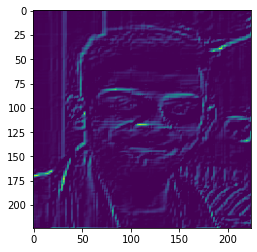

In [30]:
pyplot.imshow(features[0,:,:,0])

1/1 [==============================] - 0s 20ms/step


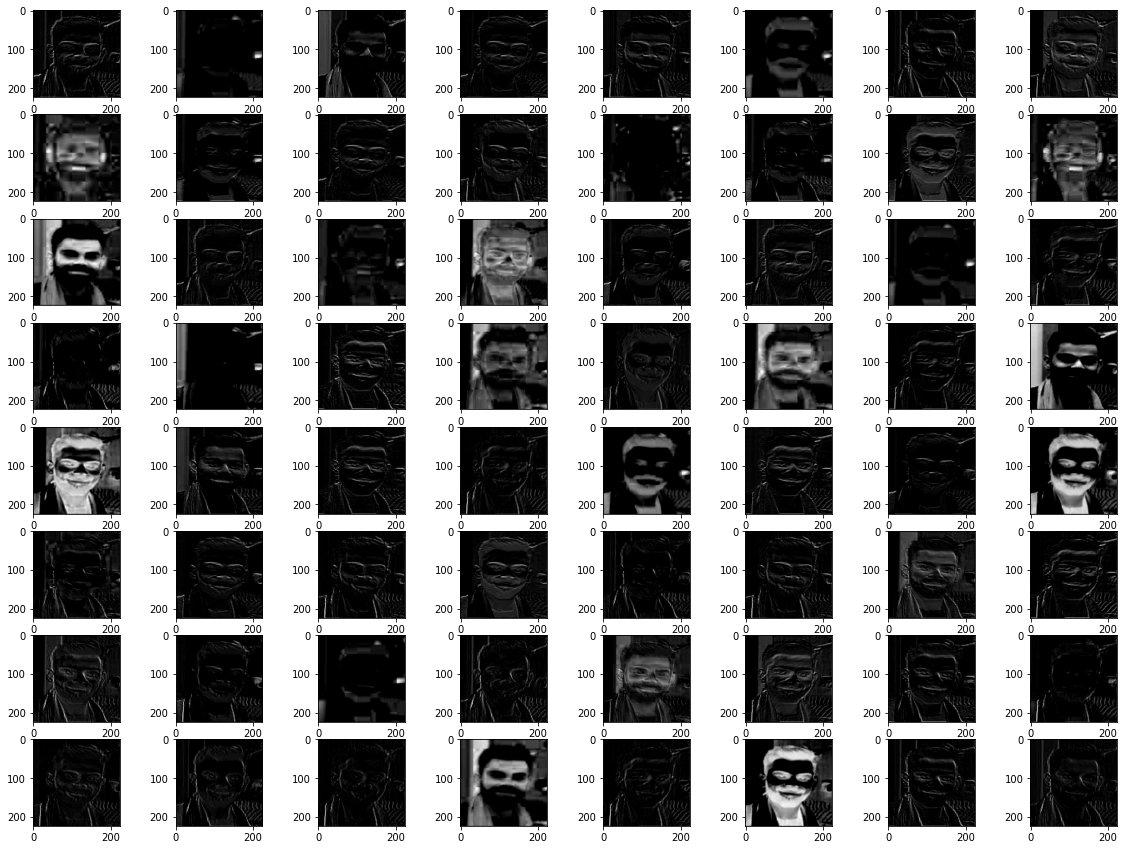

In [19]:
#calculating features_map
features = model.predict(image)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')
    
pyplot.show()

In [20]:
model2 = VGG16()

In [22]:
layer_index = [ 2, 5 , 9 , 13 , 17]
outputs = [model2.layers[i].output for i in layer_index]

model3 = keras.models.Model( inputs= model2.inputs, outputs = outputs)

1/1 [==============================] - 1s 1s/step


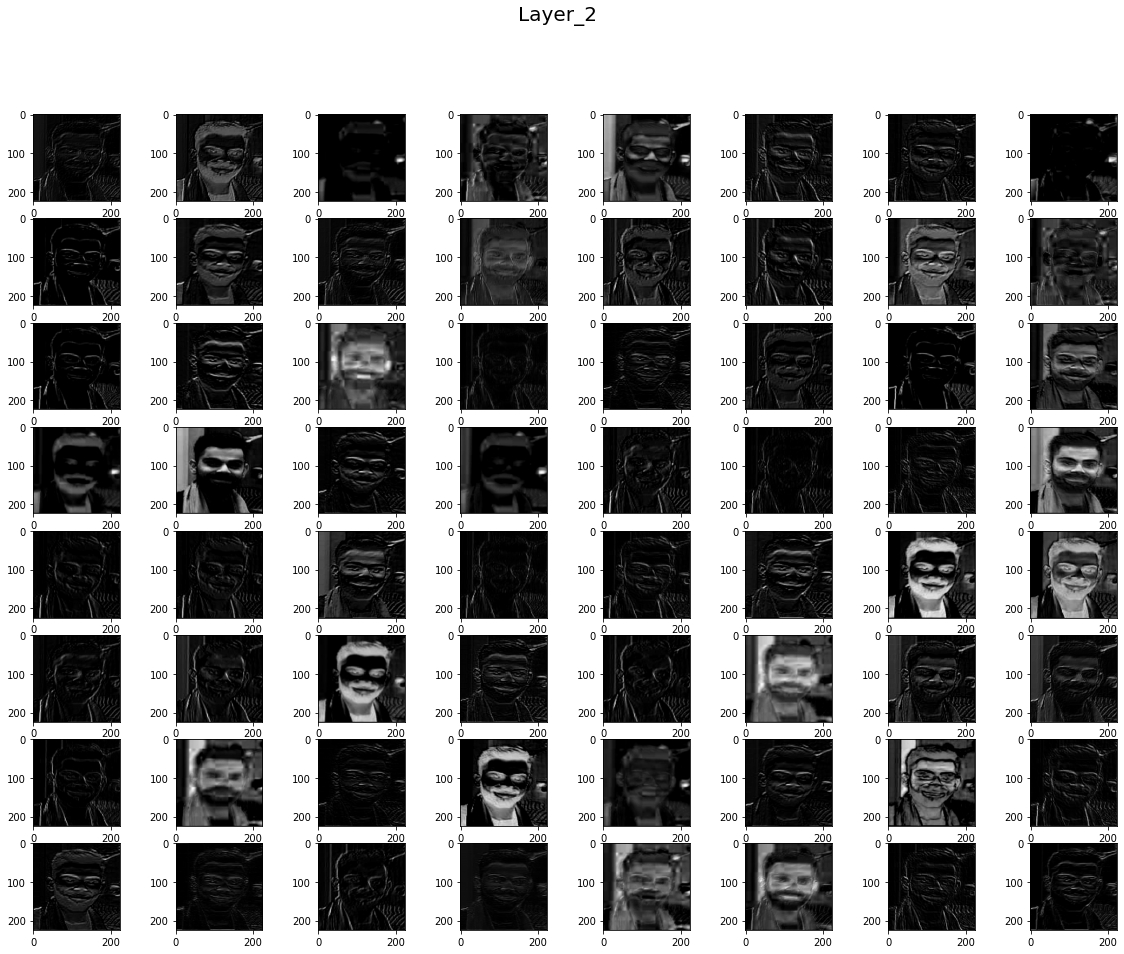

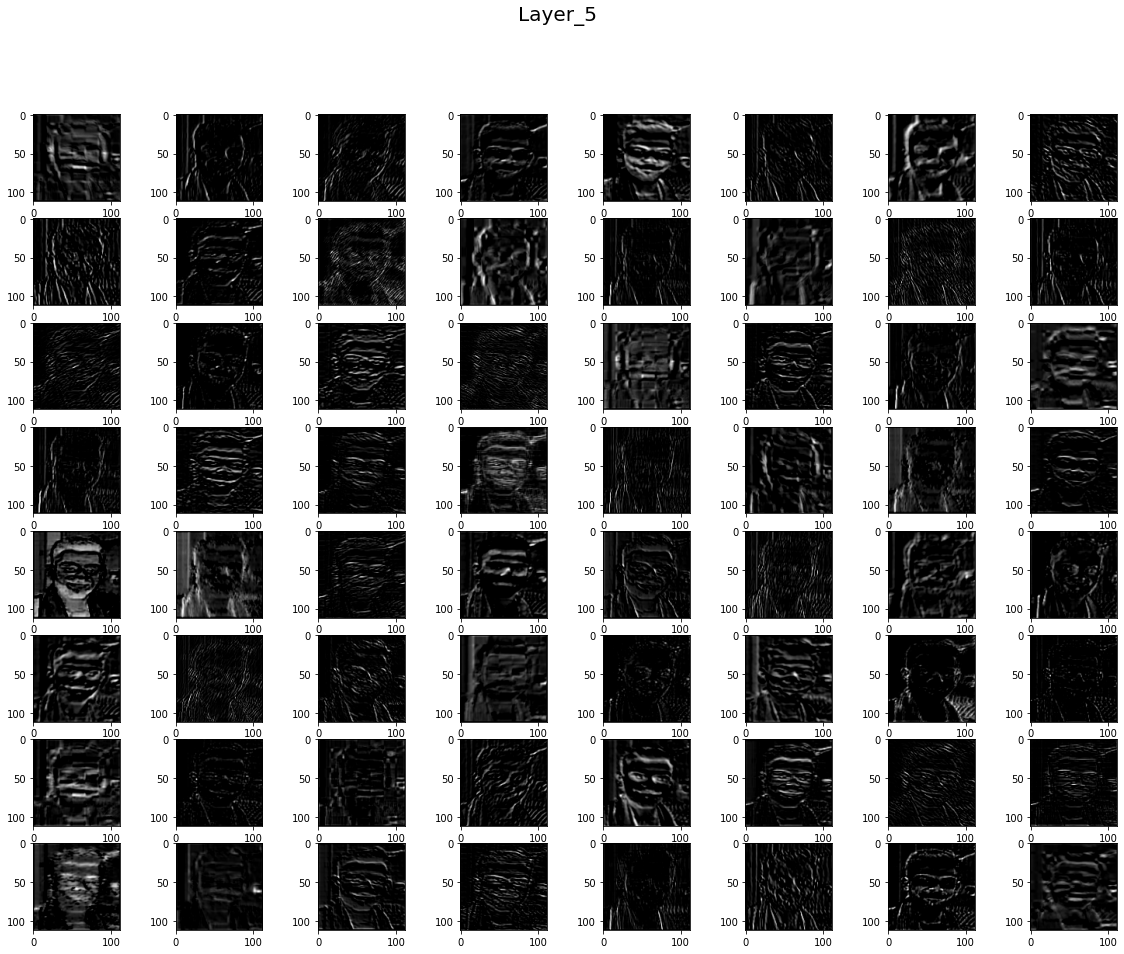

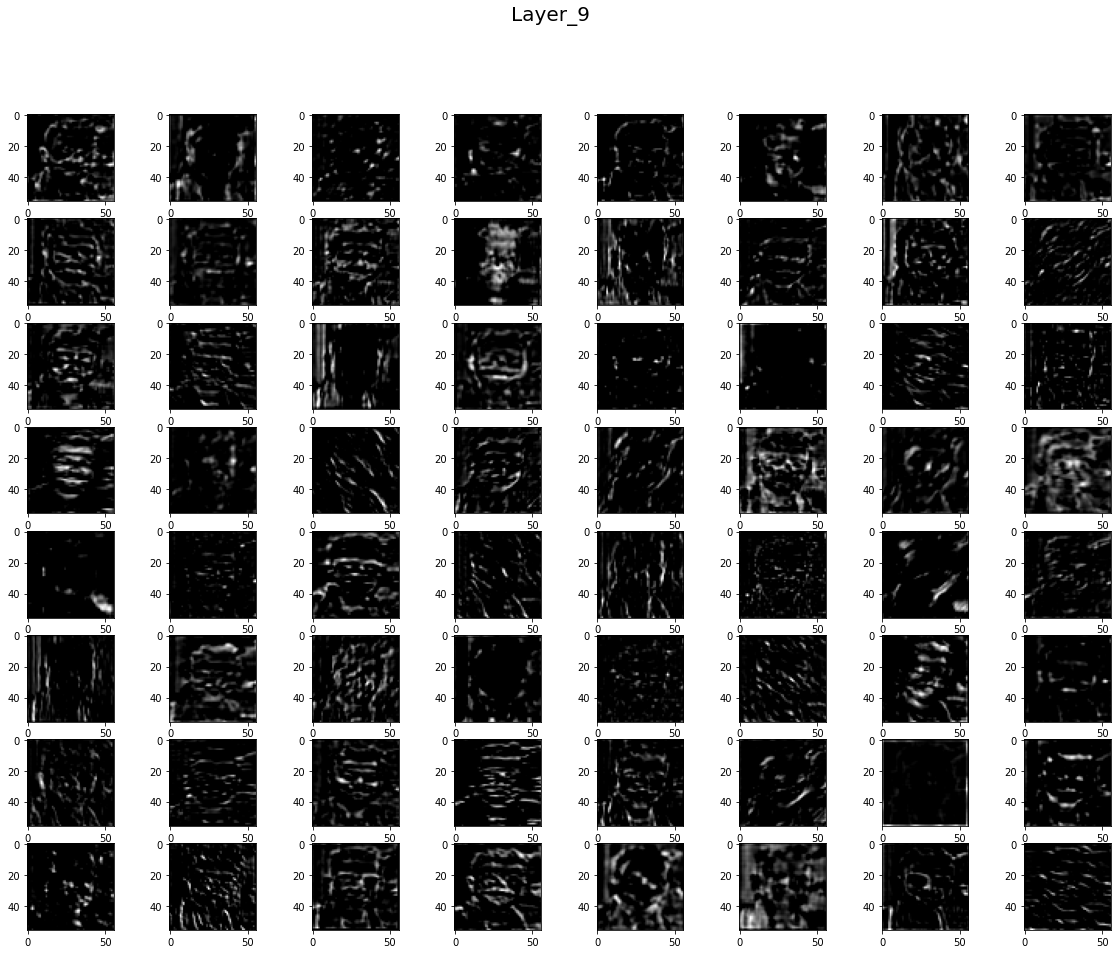

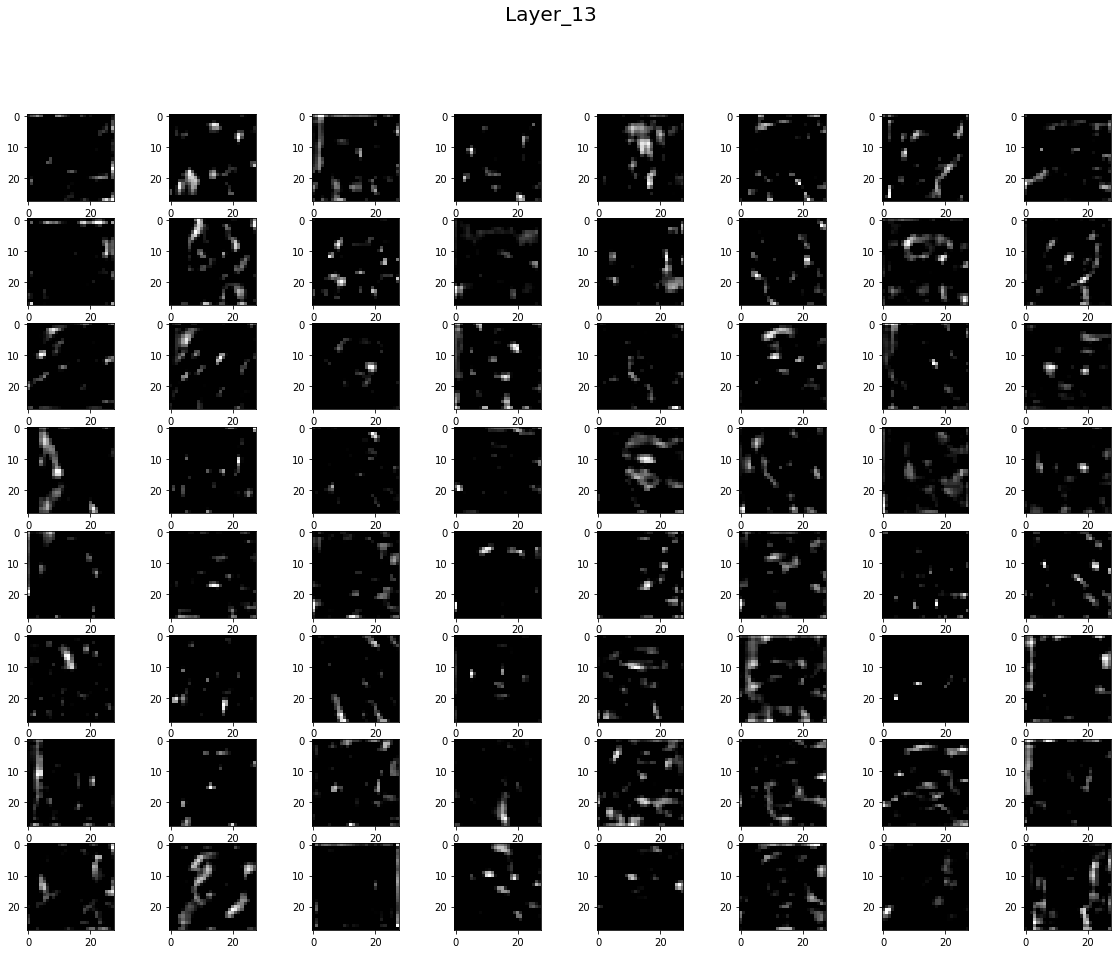

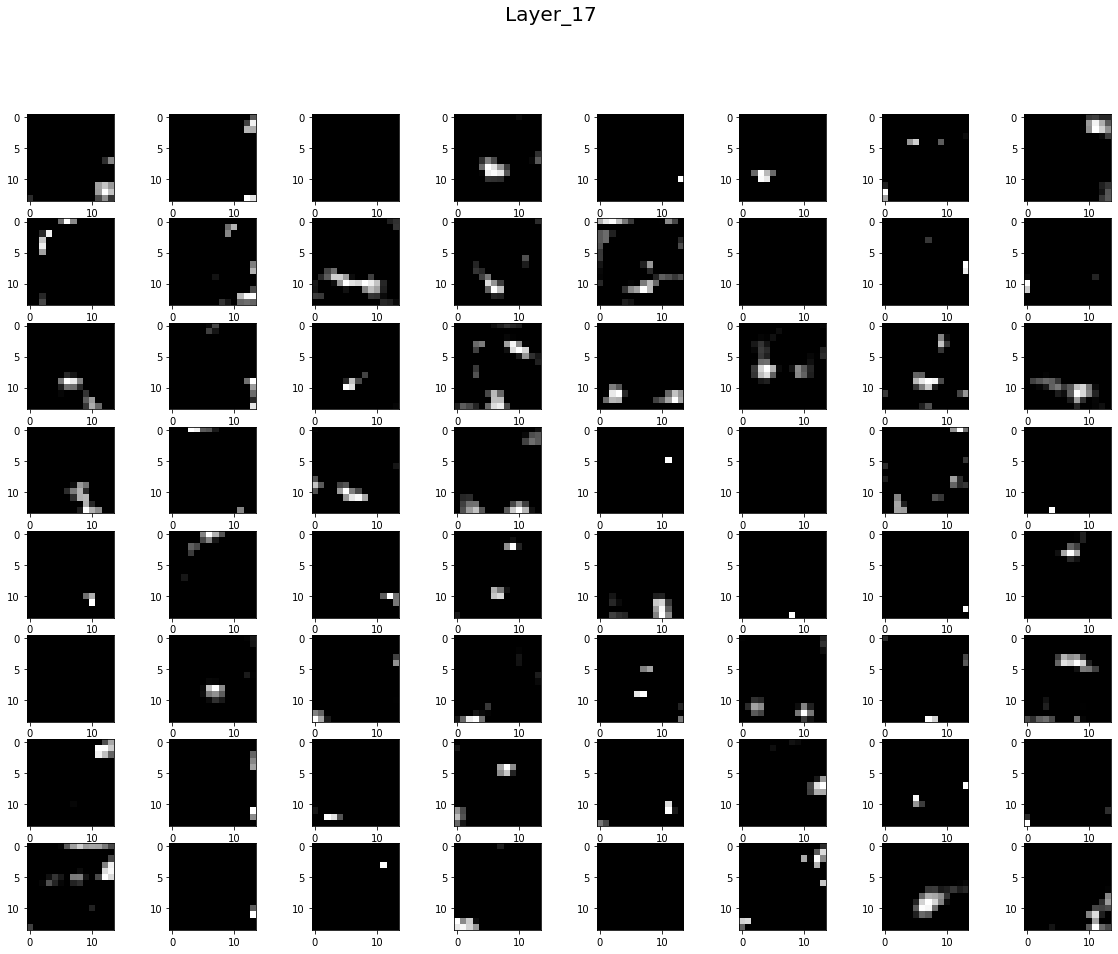

In [23]:
feature_map = model3.predict(image)

for i,fmap in zip(layer_index,feature_map):
    fig = pyplot.figure(figsize=(20,15))
    fig.suptitle("Layer_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[3]+1):

        pyplot.subplot(8,8,i)
        pyplot.imshow(fmap[0,:,:,i-1] , cmap='gray')
    
pyplot.show()